# Draw color-color diagram

In [2]:
!pip install astroquery

In [3]:
from astroquery.simbad import Simbad
# https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
Simbad.add_votable_fields('typed_id')

### Path to data directory

In [14]:
import os

data_directory_path= "../data" # If saved elswhere, this must be changed
print(data_directory_path)

../data


### Reading data from Simbad

In [15]:
Simbad.list_votable_fields()

--NOTES--

1. The parameter filtername must correspond to an existing filter. Filters include: B,V,R,I,J,K.  They are checked by SIMBAD but not astroquery.simbad

2. Fields beginning with rvz display the data as it is in the database. Fields beginning with rv force the display as a radial velocity. Fields beginning with z force the display as a redshift

3. For each measurement catalog, the VOTable contains all fields of the first measurement. When applicable, the first measurement is the mean one. 

Available VOTABLE fields:

bibcodelist(y1-y2)
biblio
cel
cl.g
coo(opt)
coo_bibcode
coo_err_angle
coo_err_maja
coo_err_mina
coo_qual
coo_wavelength
coordinates
dec(opt)
dec_prec
diameter
dim
dim_angle
dim_bibcode
dim_incl
dim_majaxis
dim_minaxis
dim_qual
dim_wavelength
dimensions
distance
distance_result
einstein
fe_h
flux(filtername)
flux_bibcode(filtername)
flux_error(filtername)
flux_name(filtername)
flux_qual(filtername)
flux_system(filtername)
flux_unit(filtername)
fluxdata(filtername)

In [16]:
for vo_field in ["flux(U)","flux(B)","flux(V)","mk"]:
    Simbad.add_votable_fields(vo_field)

In [17]:
result_table = Simbad.query_objects(["Sirius"])

In [18]:
result_table= result_table.to_pandas()
result_table

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,...,MK_Spectral_type,MK_bibcode,FLUX_U_1,FLUX_B_1,FLUX_V_1,MK_ds_1,MK_mss_1,MK_Spectral_type_1,MK_bibcode_1,SCRIPT_NUMBER_ID
0,* alf CMa,06 45 08.9172,-16 42 58.017,9,9,11.7,10.9,90,A,O,...,A0,1993yCat.3135....0C,-1.51,-1.46,-1.46,,,A0,1993yCat.3135....0C,1


In [19]:
FLUX_U= result_table["FLUX_U"].values
FLUX_B= result_table["FLUX_B"].values
FLUX_V= result_table["FLUX_V"].values
print(FLUX_U, FLUX_B, FLUX_V)

[-1.51] [-1.46] [-1.46]


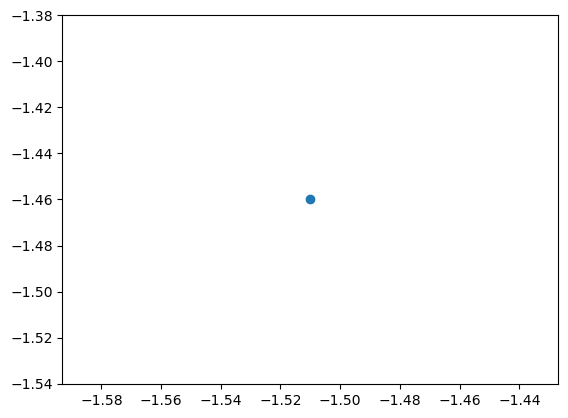

In [20]:
import matplotlib.pyplot as plt
plt.scatter(FLUX_U, FLUX_B)

### Task

* Load the star list `star_list.dat`.

* Plot a color-color diagram for those stars: (U-B) vs. (B-V).

* Select one star from each spectral type and retrieve their spectra obtained in the [UVES POP (Field Stars)](http://www.eso.org/sci/observing/tools/uvespop/field_stars_uptonow.html) project. Display their spectral lines - H$\alpha$ (~6650) - on the plot.

In [21]:
file_path= os.path.join(data_directory_path,"star_list.txt")

In [22]:
stars_names= [] # Below read star names to empty list star_names
# ...

In [23]:
# Use Simbad.query_objects to download information about the whole sample

In [25]:
# Calculate color indices U-B and B-V

In [26]:
# Display color-color diagram using plt.scatter(FLUX_U, FLUX_B)